# Importing Libraries

In [2]:
import glob
import random
import os
import math
import itertools
import sys

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image
import argparse# Importing Libraries

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader
from torch.autograd import Variable

from torchvision.models import vgg19

In [3]:
from ECV_Generator import *
from util import *

## Importing Model and Loading Pretrained Weights

In [4]:
model = color_ecv()
model.load_state_dict(torch.load("pretrained_models/generator.pth"))
model.eval()

color_ecv(
  (model): ECCVGenerator(
    (model1): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (model2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (model3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): Conv2d(256, 256, kernel_size=(3

## Test Dataset

In [5]:
class TestDataset(Dataset):
    def __init__(self, root, single_image):
        if single_image:
            self.files = [root]
        else:
            self.files = sorted(glob.glob(root + "/*.*"))
        
    def __getitem__(self, index):
       
        black_path = self.files[index % len(self.files)]
        img_black = np.asarray(Image.open(black_path))
        if(img_black.ndim==2):
            img_black = np.tile(img_black[:,:,None],3)
        (tens_l_orig, tens_l_rs) = preprocess_img(img_black, HW=(400, 400))

        return {"black": tens_l_rs.squeeze(0), 'orig': tens_l_orig.squeeze(0), 'path' : black_path}
    
    def __len__(self):
        return len(self.files)

## Predict Outputs

In [6]:
def predict_outputs(model, dataset):
    #image = single_image
    batch_size = 1
    dataloader = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = False,
        num_workers = 0,
    )

    cuda = torch.cuda.is_available()
    if cuda:
        model = model.to('cuda')

    Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor
    outputs = {}
    for i, imgs in enumerate(dataloader):
        imgs_black = Variable(imgs["black"].type(Tensor))
        imgs_black_orig = Variable(imgs["orig"].type(Tensor))
        gen_ab = model(imgs_black)
        gen_ab.detach_
        gen_color = postprocess_tens_new(imgs_black_orig, gen_ab)[0].transpose(1,2,0)
        outputs[imgs["path"][0]] = gen_color
    return outputs

## Print Output Images

In [7]:
def print_images(outputs):
    for i in outputs.keys():
        print("----------- The Black and White Image -----------")
        plt.imshow(plt.imread(i))
        plt.show()
        print("----------- The Colourfull Image Generated -----------")
        plt.imshow(outputs[i])
        plt.show()

## Save Output Images

In [8]:
def save_outputs(outputs, folder_path, single_image):
    os.makedirs(folder_path,  exist_ok=True)
    for i in outputs.keys():
        if single_image:
            name = i.split('/')[-1]
        else:
            name = i.split('\\')[-1]
        image = Image.fromarray((outputs[i] * 255).astype(np.uint8)) 
        image.save(folder_path + '/' + name)

# Testing for a Single image
- If passing path of a single image, then set **single_image** = **True**.
- If passing path for folder containing multiple images, then set it to **False**

----------- The Black and White Image -----------


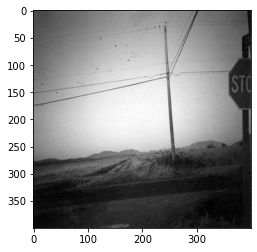

----------- The Colourfull Image Generated -----------


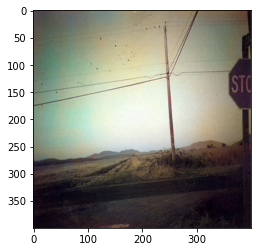

In [10]:
single_image = True
path = 'sample/1.jpg'
dataset = TestDataset(path, single_image)
outputs = predict_outputs(model, dataset)

print_images(outputs)

save_outputs(outputs, folder_path = 'Outputs/single_Outputs', single_image = single_image)

# Testing for  Multiple images
- If passing path of a single image, then set **single_image** = **True**.
- If passing path for folder containing multiple images, then set it to **False**

----------- The Black and White Image -----------


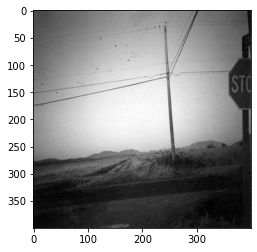

----------- The Colourfull Image Generated -----------


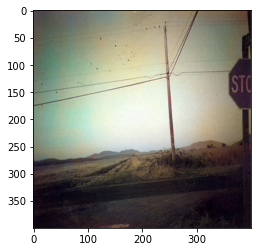

----------- The Black and White Image -----------


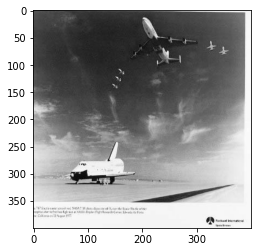

----------- The Colourfull Image Generated -----------


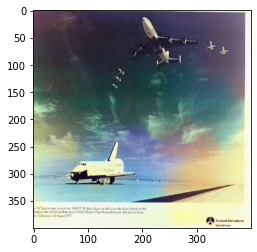

----------- The Black and White Image -----------


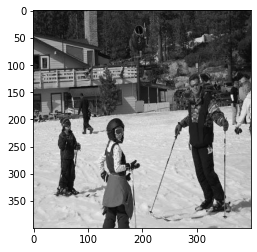

----------- The Colourfull Image Generated -----------


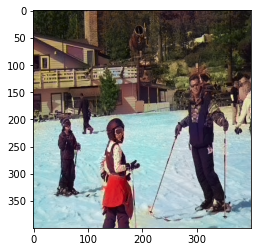

----------- The Black and White Image -----------


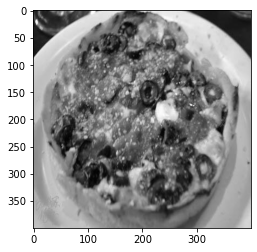

----------- The Colourfull Image Generated -----------


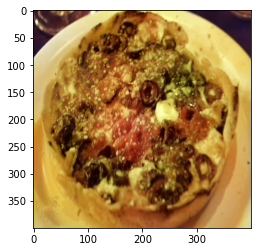

----------- The Black and White Image -----------


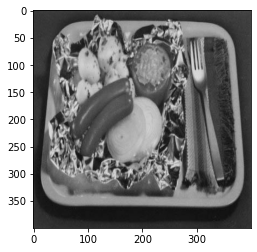

----------- The Colourfull Image Generated -----------


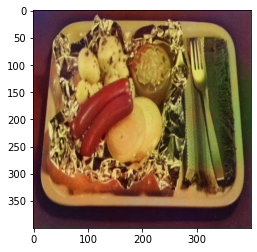

----------- The Black and White Image -----------


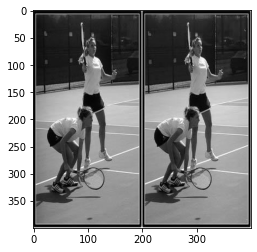

----------- The Colourfull Image Generated -----------


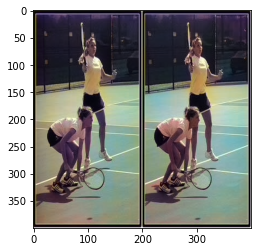

----------- The Black and White Image -----------


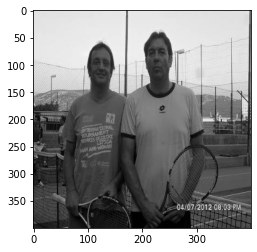

----------- The Colourfull Image Generated -----------


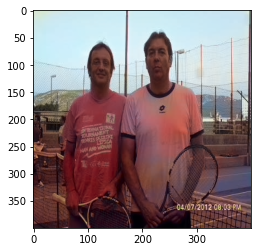

----------- The Black and White Image -----------


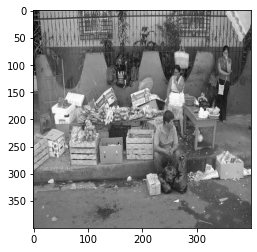

----------- The Colourfull Image Generated -----------


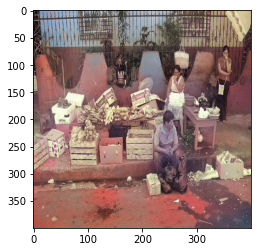

----------- The Black and White Image -----------


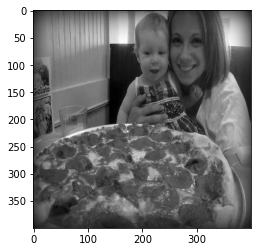

----------- The Colourfull Image Generated -----------


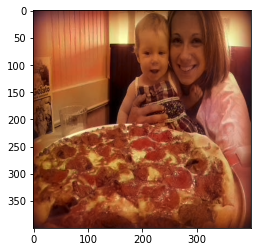

----------- The Black and White Image -----------


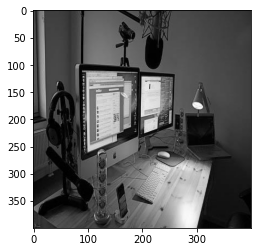

----------- The Colourfull Image Generated -----------


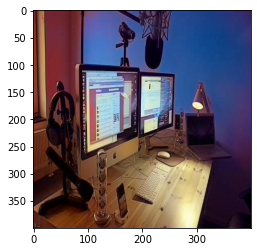

----------- The Black and White Image -----------


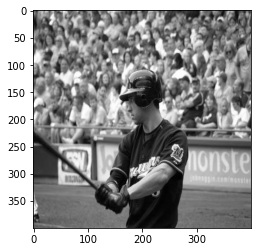

----------- The Colourfull Image Generated -----------


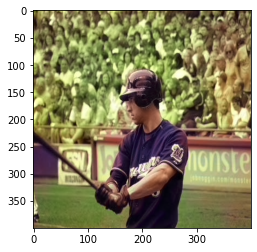

----------- The Black and White Image -----------


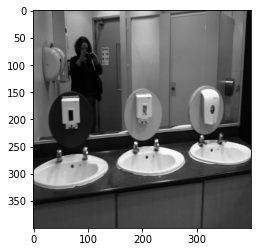

----------- The Colourfull Image Generated -----------


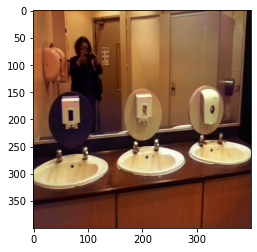

In [12]:
single_image = False
path = 'sample'
dataset = TestDataset(path, single_image)
outputs = predict_outputs(model, dataset)

print_images(outputs)

save_outputs(outputs, folder_path = 'Outputs/multiple_Outputs', single_image = single_image)